In [ ]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import matplotlib.widgets as wid

import randproc as rp
import speech_proc as sp 
import covariance as cov
import estimation as es

In [7]:
#%% Initializations


def show_signal(signal,fig):

    Nit = 500     # number of paths
    H   = 20      # number of points for covariance
    n   = 2*H -1  # number of process' samples
    displayRatio = 1000; # 1/displayRatio graphs are displayed
                      # increase displayRatio to speed up,
                      # in particular if Nit/displayRatio>100

    EX     = np.zeros(n)          # Expectations are stored here
    gamma  = np.zeros(n)          # ACF's are stored here
    tc     = np.arange(-(H-1),H)  # temporal axis for ACF
    t      = np.arange(0,n)       # temporal axis for the signal



    #%% Create a figure for interactive display of results
    class btnAction(object):
        stopnow=0
        def stop(self,event):      
            self.stopnow = 1        
            if k==Nit:
                plt.close(1)

   

    # Create the figure where the results will be shown        
    plt.figure(fig,[H, 8])
    plt.subplot(211, label='mean')
    plt.grid()
    plt.title('Sample averages')
    plt.subplot(212, label='ACF')
    plt.grid()
    plt.title('Sample covariance')
    axstop = plt.axes([0.81, 0.01, 0.08, 0.05])
    btn = wid.Button(axstop, 'Stop')
    callback = btnAction()
    btn.on_clicked(callback.stop)


    #%% Iterations
    for k in range(Nit+1):
        # k-th realization of the process

        if signal=='AR':

            # Generate an AR(1) signal
            Z = np.random.normal(0,1,n) # White noise
            # Build the rational function P/Q
            phi1  = 0.6
            Pcoeffs = np.array([1.])                 
            Qcoeffs = np.poly((phi1,))
            # Use P/Q for filtering
            X = sig.lfilter(Pcoeffs, Qcoeffs,Z)


        elif signal=='SIN'    :
        #  Armonic signal
            #A=2.;
            #A_0= -A+2*A*np.random.random_sample();
            A_0 = 1.
            omega = np.pi/3.
            phi =   np.pi +2*np.pi*np.random.random_sample();
            X = A_0 * np.cos(omega*tc+phi) +  np.random.normal(0,1,n)

        else: #  white noise
            sigma = 1.
            X = np.random.normal(0,sigma,n)


        # Compute empirical means
        EX = EX + X

        # Compute exmpirical covariances
        for h in range(H):
            # compiute cov for lag = h
            XX  = X[0:n-H] * X[h:h+n-H]
            EXX =  XX.sum() / float(n-H)      # computation of the unbiased ACF estim
            gamma[h+H-1] = gamma[h+H-1] + EXX # gamma[H-1] = cov(X_n, X_n)
            gamma[H-h-1] = gamma[h+H-1].conj()     

        # Displaying results (only once every "displayRatio" iterations)
        if np.mod(k,displayRatio)==0:
            plt.figure(fig)

            # Dislpay sample averages
            plt.subplot(211,label='mean')
            if k == 0: # Create the line at iteration 0
                line1, = plt.plot(t, EX, '-o' )
            else:    #update the average EX/(k+1)
                line1.set_ydata( EX/(k+1))
                plt.ylim([-1.5, 1.5])
                plt.xticks(t)

            #Display the unbiased sample covariance
            plt.subplot(212,label='ACF')
            if k == 0:# Create the line at iteration 0
                line2, = plt.plot(tc, gamma, '-o' )
            else: # Update the sample covariance plot
                line2.set_ydata( gamma/(k+1))

            plt.pause(0.001) 
            plt.ylim([-1.2, 2])
            plt.show()
            plt.xticks(tc)   
            plt.text(4,-1, 'Iteration %5d'%k, bbox=dict(facecolor='white', alpha=1))

        if callback.stopnow == 1:
            plt.close(1)
            break 

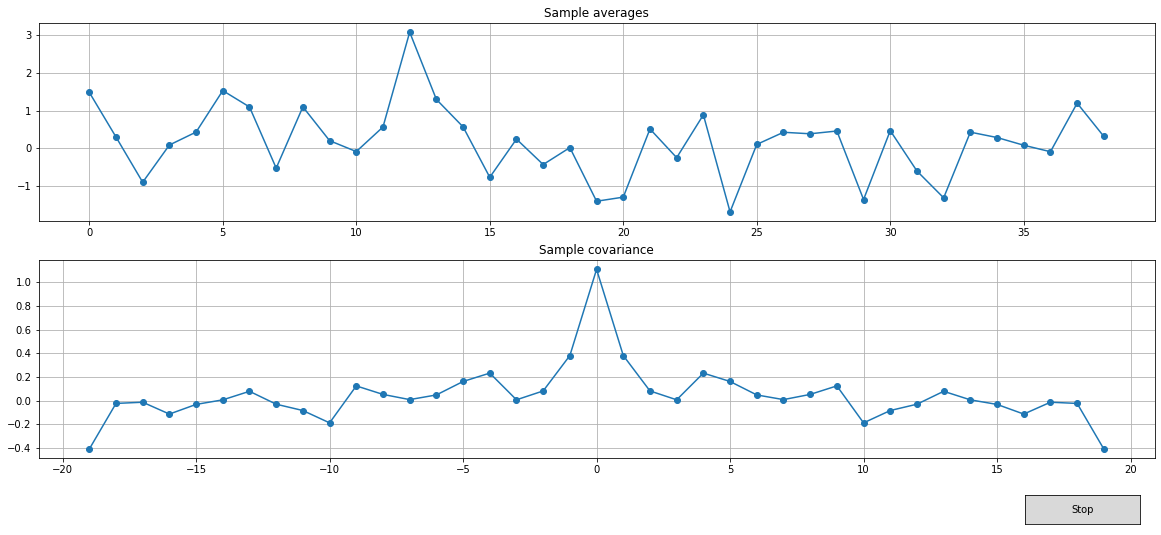

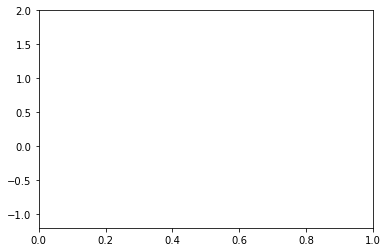

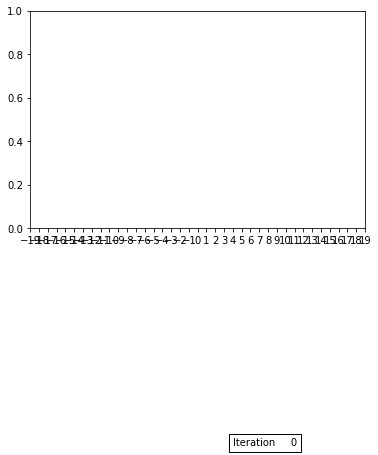

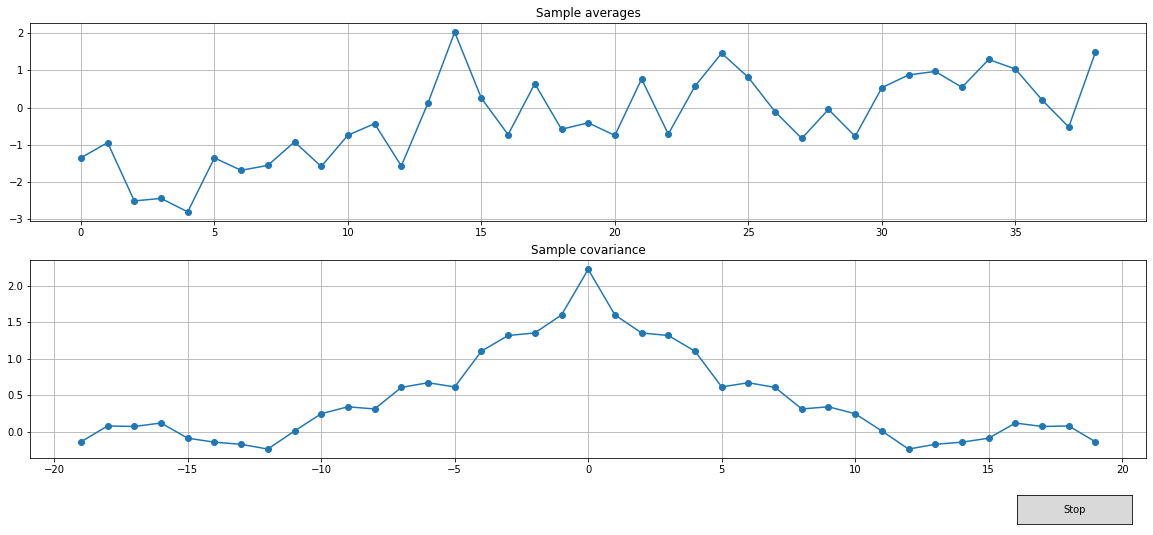

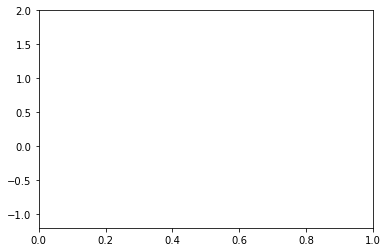

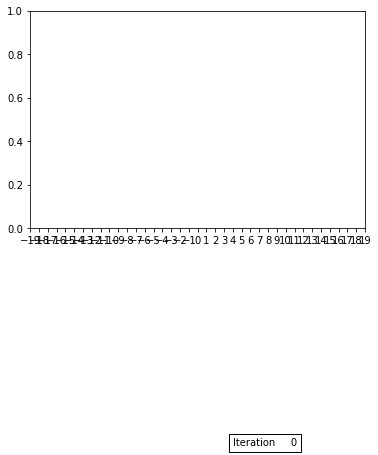

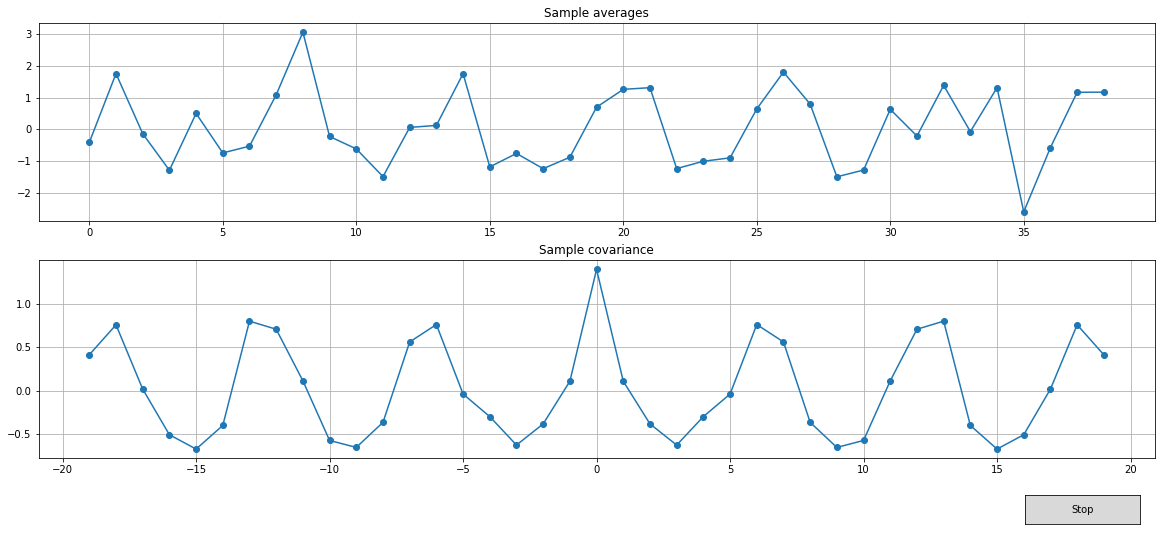

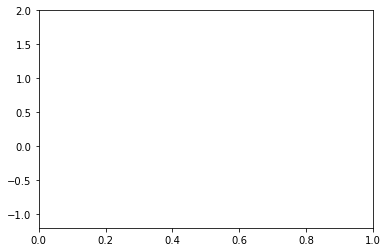

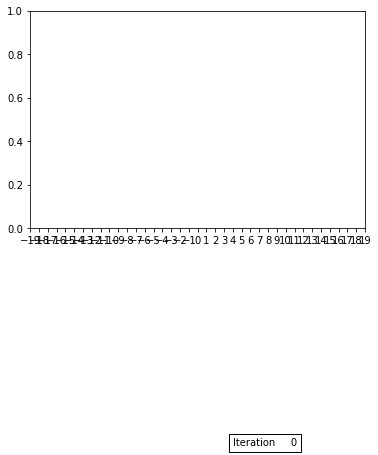

In [8]:
signals = ['WN', 'AR','SIN']
show_signal('WR',1)
show_signal('AR',2)
show_signal('SIN',3)
    
    